## **1-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!**

### **(1) 데이터 가져오기**

* sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
* diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
# 필요한 모듈 import하기
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# 데이터 불러오기
diabetes = load_diabetes()

In [3]:
# 데이터프레임으로 변환하기
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
# 데이터 저장하기
df_X = diabetes.data
df_y = diabetes.target

### **(2) 모델에 입력할 데이터 X 준비하기**

* df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
# 데이터 X 준비하기
X = np.array(df_X)
X.shape

(442, 10)

### **(3) 모델에 예측할 데이터 y 준비하기**

* df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
# 데이터 y 준비하기
y = np.array(df_y)
y.shape

(442,)

### **(4) train 데이터와 test 데이터로 분리하기**

* X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [7]:
# 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### **(5) 모델 준비하기**

* 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
* 모델 함수를 구현해주세요.

In [8]:
# 가중치 준비하기
W = np.random.rand(10) # 피처 개수 총 10개
b = np.random.rand()

In [9]:
# 모델 함수 구현하기
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### **(6) 손실함수 loss 정의하기**

* 손실함수를 MSE 함수로 정의해주세요.

In [10]:
# MSE 함수 구현하기
def MSE(a, b):
    mse = ((a - b) **2).mean() # 두 값의 차이의 제곱의 평균
    return mse

In [11]:
# 손실함수 정의하기
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### **(7) 기울기를 구하는 gradient 함수 구현하기**

* 기울기를 계산하는 gradient 함수를 구현해주세요.

In [12]:
# gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [13]:
# 경사 계산해보기
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37034704 -0.31020689 -4.28659989 -3.22470689 -1.54122521 -1.26390642
  2.88804638 -3.14290969 -4.13536523 -2.7912375 ]
db: -304.1596798672125


### **(8) 하이퍼 파라미터인 학습률 설정하기**

* 학습률, learning rate 를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [14]:
# 학습률 설정하기
LEARNING_RATE = 0.03

### **(9) 모델 학습하기**

* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [15]:
losses = [] # 손실함수값이 단계별로 얼마 정도인지를 저장할 리스트

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train) # 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    W -= LEARNING_RATE * dW #  w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db # b = b - η * db 로 업데이트 
    L = loss(X_train, W, b, y_train) # 현재의 loss 값 계산
    losses.append(L) # loss 값 기록
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 12752.1410
Iteration 20 : Loss 7876.0899
Iteration 30 : Loss 6446.3953
Iteration 40 : Loss 6016.6338
Iteration 50 : Loss 5877.0965
Iteration 60 : Loss 5821.8953
Iteration 70 : Loss 5791.3006
Iteration 80 : Loss 5767.9833
Iteration 90 : Loss 5746.9149
Iteration 100 : Loss 5726.6350
Iteration 110 : Loss 5706.7186
Iteration 120 : Loss 5687.0409
Iteration 130 : Loss 5667.5643
Iteration 140 : Loss 5648.2766
Iteration 150 : Loss 5629.1727
Iteration 160 : Loss 5610.2499
Iteration 170 : Loss 5591.5061
Iteration 180 : Loss 5572.9391
Iteration 190 : Loss 5554.5472
Iteration 200 : Loss 5536.3285
Iteration 210 : Loss 5518.2811
Iteration 220 : Loss 5500.4033
Iteration 230 : Loss 5482.6933
Iteration 240 : Loss 5465.1492
Iteration 250 : Loss 5447.7693
Iteration 260 : Loss 5430.5520
Iteration 270 : Loss 5413.4954
Iteration 280 : Loss 5396.5979
Iteration 290 : Loss 5379.8579
Iteration 300 : Loss 5363.2735
Iteration 310 : Loss 5346.8433
Iteration 320 : Loss 5330.5656
Iteration 330 : 

Iteration 3410 : Loss 3502.0309
Iteration 3420 : Loss 3500.1683
Iteration 3430 : Loss 3498.3143
Iteration 3440 : Loss 3496.4689
Iteration 3450 : Loss 3494.6321
Iteration 3460 : Loss 3492.8038
Iteration 3470 : Loss 3490.9839
Iteration 3480 : Loss 3489.1724
Iteration 3490 : Loss 3487.3692
Iteration 3500 : Loss 3485.5743
Iteration 3510 : Loss 3483.7875
Iteration 3520 : Loss 3482.0090
Iteration 3530 : Loss 3480.2384
Iteration 3540 : Loss 3478.4760
Iteration 3550 : Loss 3476.7215
Iteration 3560 : Loss 3474.9749
Iteration 3570 : Loss 3473.2361
Iteration 3580 : Loss 3471.5052
Iteration 3590 : Loss 3469.7821
Iteration 3600 : Loss 3468.0666
Iteration 3610 : Loss 3466.3588
Iteration 3620 : Loss 3464.6586
Iteration 3630 : Loss 3462.9659
Iteration 3640 : Loss 3461.2807
Iteration 3650 : Loss 3459.6030
Iteration 3660 : Loss 3457.9327
Iteration 3670 : Loss 3456.2697
Iteration 3680 : Loss 3454.6140
Iteration 3690 : Loss 3452.9655
Iteration 3700 : Loss 3451.3243
Iteration 3710 : Loss 3449.6901
Iteratio

Iteration 6120 : Loss 3192.1517
Iteration 6130 : Loss 3191.4587
Iteration 6140 : Loss 3190.7678
Iteration 6150 : Loss 3190.0791
Iteration 6160 : Loss 3189.3924
Iteration 6170 : Loss 3188.7077
Iteration 6180 : Loss 3188.0252
Iteration 6190 : Loss 3187.3447
Iteration 6200 : Loss 3186.6663
Iteration 6210 : Loss 3185.9899
Iteration 6220 : Loss 3185.3156
Iteration 6230 : Loss 3184.6433
Iteration 6240 : Loss 3183.9730
Iteration 6250 : Loss 3183.3047
Iteration 6260 : Loss 3182.6385
Iteration 6270 : Loss 3181.9743
Iteration 6280 : Loss 3181.3120
Iteration 6290 : Loss 3180.6518
Iteration 6300 : Loss 3179.9935
Iteration 6310 : Loss 3179.3372
Iteration 6320 : Loss 3178.6829
Iteration 6330 : Loss 3178.0305
Iteration 6340 : Loss 3177.3801
Iteration 6350 : Loss 3176.7316
Iteration 6360 : Loss 3176.0851
Iteration 6370 : Loss 3175.4405
Iteration 6380 : Loss 3174.7978
Iteration 6390 : Loss 3174.1570
Iteration 6400 : Loss 3173.5182
Iteration 6410 : Loss 3172.8812
Iteration 6420 : Loss 3172.2462
Iteratio

Iteration 9290 : Loss 3048.0042
Iteration 9300 : Loss 3047.7205
Iteration 9310 : Loss 3047.4374
Iteration 9320 : Loss 3047.1551
Iteration 9330 : Loss 3046.8736
Iteration 9340 : Loss 3046.5928
Iteration 9350 : Loss 3046.3128
Iteration 9360 : Loss 3046.0335
Iteration 9370 : Loss 3045.7550
Iteration 9380 : Loss 3045.4772
Iteration 9390 : Loss 3045.2001
Iteration 9400 : Loss 3044.9238
Iteration 9410 : Loss 3044.6482
Iteration 9420 : Loss 3044.3734
Iteration 9430 : Loss 3044.0993
Iteration 9440 : Loss 3043.8259
Iteration 9450 : Loss 3043.5532
Iteration 9460 : Loss 3043.2813
Iteration 9470 : Loss 3043.0100
Iteration 9480 : Loss 3042.7395
Iteration 9490 : Loss 3042.4698
Iteration 9500 : Loss 3042.2007
Iteration 9510 : Loss 3041.9323
Iteration 9520 : Loss 3041.6647
Iteration 9530 : Loss 3041.3978
Iteration 9540 : Loss 3041.1316
Iteration 9550 : Loss 3040.8660
Iteration 9560 : Loss 3040.6012
Iteration 9570 : Loss 3040.3371
Iteration 9580 : Loss 3040.0737
Iteration 9590 : Loss 3039.8110
Iteratio

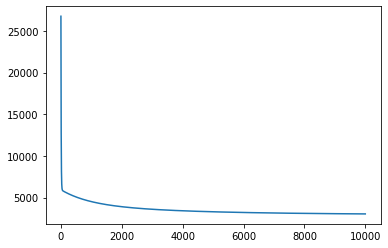

In [16]:
# 시각화하기
plt.plot(losses)
plt.show()

In [17]:
# W, b값 확인하기
W, b

(array([  20.33452668, -162.9470442 ,  422.25343117,  282.24731892,
         -55.18041086,  -91.04227197, -217.77944116,  141.2543414 ,
         353.38898164,  125.44984598]),
 154.39701324661806)

### **(10) test 데이터에 대한 성능 확인하기**

* test 데이터에 대한 성능을 확인해주세요.

In [18]:
# test 데이터로 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2680.137026151103

### **(11) 정답 데이터와 예측한 데이터 시각화하기**

* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

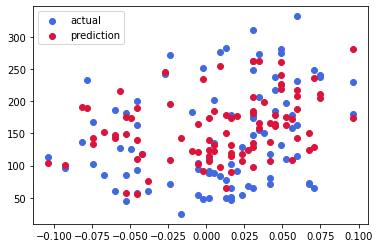

In [19]:
# 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test, color='royalblue', label='actual') 
plt.scatter(X_test[:, 0], prediction, color='crimson', label='prediction')
plt.legend()
plt.show()

LEARNING_RATE와 Iteration을 더 높은 값으로 지정해주고 random_state 값을 33으로 변경하여 **MSE 손실함수값 2680**을 달성하였다.

---

## **1-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

### **(1) 데이터 가져오기**

* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [20]:
# 데이터 불러오기
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

* to_datetime 활용

In [21]:
# datetime 컬럼을 datetime 자료형으로 변환하기
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### **(3) year, month, day, hour, minute, second 데이터 개수 시각화하기**

* sns.countplot 활용해서 시각화하기
* subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

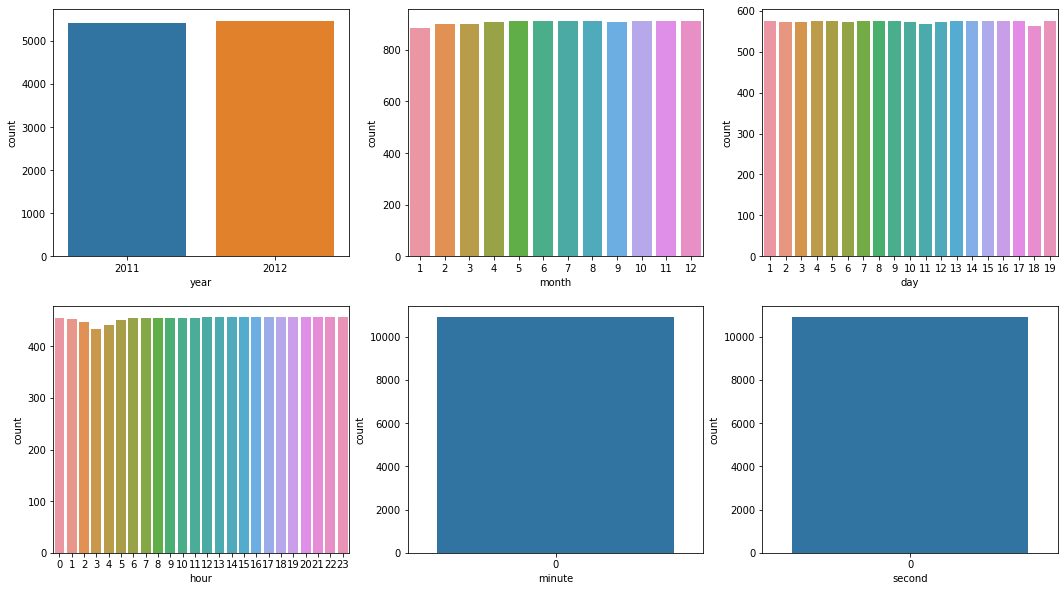

In [23]:
# 6개의 그래프 시각화하기
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='year', data=train, ax=axes[0][0])
sns.countplot(x='month', data=train, ax=axes[0][1])
sns.countplot(x='day', data=train, ax=axes[0][2])
sns.countplot(x='hour', data=train, ax=axes[1][0])
sns.countplot(x='minute', data=train, ax=axes[1][1])
sns.countplot(x='second', data=train, ax=axes[1][2])

plt.show()

### **(4) X, y 컬럼 선택 및 train/test 데이터 분리**

* X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다. 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.
* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

Heatmap으로 변수간 상관계수를 살펴보자!

<AxesSubplot:>

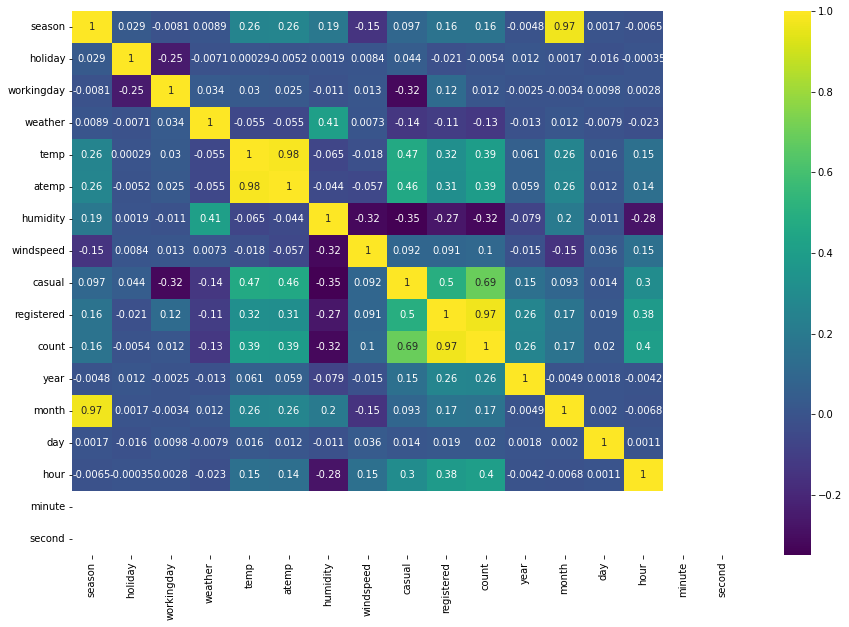

In [24]:
# 상관관계 확인하기
plt.subplots(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

요소의 값들이 다 0인 minute과 second는 제거하고 다시 확인해보기로 하였다.

In [25]:
# minute과 second 칼럼 제거
train.drop(['minute', 'second'], axis=1, inplace=True)

<AxesSubplot:>

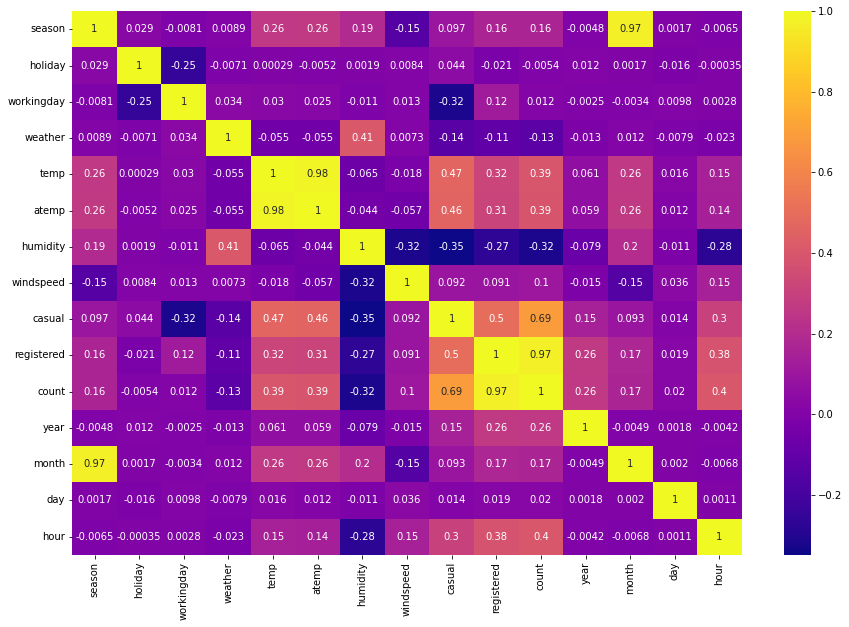

In [26]:
# 히트맵으로 시각화하기
plt.subplots(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, cmap='plasma')

* 강한 상관관계: casual, registered
* 약한 상관관계: holiday, workingday, day

위의 5가지 피처를 제거하고 진행해보기로 하였다.

In [27]:
# X 컬럼 선택하기
X = train[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour']].values

# y 컬럼 선택하기
y = train['count'].values

y = train['count']는 인덱스 정보와 함께 데이터를 포함하는 Series 객체를 반환한다.
<br>y = train['count'].values는 데이터만을 포함하는 NumPy 배열을 반환한다.

In [28]:
# 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(8708, 9) (8708,)
(2178, 9) (2178,)


### **(5) LinearRegression 모델 학습**

* sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [29]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 학습하기
model.fit(X_train, y_train)

LinearRegression()

### **(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산**

* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

In [30]:
# 예측값 출력하기
predictions = model.predict(X_test)
predictions

array([245.05601242, 227.09978396, 379.88508455, ..., 158.22342868,
       202.03378958, 285.70922719])

In [31]:
# 손실함수 값 계산하기
from sklearn.metrics import mean_squared_error

# mse
mse = mean_squared_error(y_test, predictions)
mse

18259.629048963114

In [32]:
# rmse
rmse = np.sqrt(mse)
rmse

135.12819487051217

### **(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기**

* x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

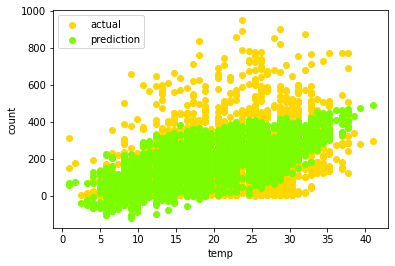

In [33]:
# temp 데이터 시각화하기
plt.scatter(X_test[:, 2], y_test, color='gold', label='actual')
plt.scatter(X_test[:, 2], predictions, color='lawngreen', label='prediction')
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

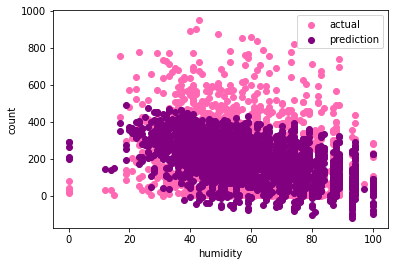

In [34]:
# humidity 데이터 시각화하기
plt.scatter(X_test[:, 4], y_test, color='hotpink', label='actual')
plt.scatter(X_test[:, 4], predictions, color='purple', label='prediction')
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

불필요한 컬럼들을 삭제하고 위의 당뇨병 프로젝트와 마찬가지로 random_state를 변경해주어 **RMSE 값 135**를 달성하였다.

---

### **프로젝트 회고**

이번 프로젝트는 단계별로 설명히 잘 되어 있어서 큰 어려움 없이 마칠 수 있었다. 해당 프로젝트를 통해 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류와 구현을 익히는 연습을 할 수 있었고, 손실함수값을 줄이기 위해서 기울기가 얼마나 중요한 요소인지 알게 되었다. 이전에도 MSE 값을 낮추어 모델의 성능을 높이는 프로젝트를 진행했었지만, 직접 함수를 구현하지는 않았었는데, 이번에는 직접 모델 함수부터 RMSE 함수까지 구현하면서 원리에 대해서 조금 더 자세하게 이해하게 되었던 것 같다. 그리고 learning rate와 random state와 같은 값들을 여러가지로 설정해보면서 loss 값이 어떻게 바뀌는지 눈으로 직접 확인할 수 있어 해당 값들을 변경함으로서 손실함수값에 어떤 영향을 끼치는지 확실하게 알 수 있었다. 프로젝트 2번에서와 같이, 확실히 사이킷런(sklearn) 라이브러리를 사용하면 모델이 학습하기 위한 손실함수, 기울기 계산을 직접할 필요가 없기 때문에 훠~얼씬 간편한 것 같다. 또한 시각화를 진행하면서 seaborn에 얼마나 다양한 color palette들이 존재하는지 알 수 있었으며 꾸미는 맛이 있었다! 🎨🌈

#### **새로 알게 된 것!**
**(개념 정리하고 가즈아~)**
* 모델 학습: 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 "매개변수", 혹은 "파라미터" 를 찾는다는 뜻
* 모델의 오차: 정답과 예측값 간의 차이
* 손실함수(loss function) / 비용함수(cost function): 모델의 오차를 계산하는 함수
* 경사하강법(Gradient Descent Method): 기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식
* 하이퍼 파라미터: 사람이 직접 사전에 정하고 시작해야 하는 파라미터

**“모델이 얼마나 틀렸는지를 평가하는 지표”로는 네 가지가 있다.**
* MAE: Mean Absolute Error, 오차의 절댓값의 평균
* MSE: Mean Squared Error, 오차의 제곱의 평균
* RMSE: Root Mean Squared Error, MSE의 제곱근
* R-squared: Coefficient of Determination, 결정 계수

**참고한 레퍼런스**
<br>[Pandas 기초] 시계열 데이터(timeseries), Timestamp와 Period https://yganalyst.github.io/data_handling/Pd_8/
<br>상관관계 분석(Pandas) & Heatmap 그리기 https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816
<br>19-09 numpy로 변환 (values) https://wikidocs.net/151305
<br>데이터 추출(array, to_numpy, values)-pandas(8) https://kongdols-room.tistory.com/110